In [1]:
import pandas as pd
import numpy as np
import calendar
import re 
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sp
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report
from sklearn.model_selection import cross_val_score
%matplotlib inline

In [2]:
data_train = pd.read_csv("train.csv").dropna().replace("MENS WEAR","MENSWEAR")
data_train_orig = pd.read_csv("train.csv").dropna().replace("MENS WEAR","MENSWEAR")
data_test = pd.read_csv("test.csv").dropna().replace("MENS WEAR","MENSWEAR")

In [3]:
dept_list = list(data_train.DepartmentDescription.dropna().unique())
dept_list

['FINANCIAL SERVICES',
 'SHOES',
 'PERSONAL CARE',
 'PAINT AND ACCESSORIES',
 'DSD GROCERY',
 'MEAT - FRESH & FROZEN',
 'DAIRY',
 'PETS AND SUPPLIES',
 'HOUSEHOLD CHEMICALS/SUPP',
 'IMPULSE MERCHANDISE',
 'PRODUCE',
 'CANDY, TOBACCO, COOKIES',
 'GROCERY DRY GOODS',
 'BOYS WEAR',
 'FABRICS AND CRAFTS',
 'JEWELRY AND SUNGLASSES',
 'MENSWEAR',
 'ACCESSORIES',
 'HOME MANAGEMENT',
 'FROZEN FOODS',
 'SERVICE DELI',
 'INFANT CONSUMABLE HARDLINES',
 'PRE PACKED DELI',
 'COOK AND DINE',
 'PHARMACY OTC',
 'LADIESWEAR',
 'COMM BREAD',
 'BAKERY',
 'HOUSEHOLD PAPER GOODS',
 'CELEBRATION',
 'HARDWARE',
 'BEAUTY',
 'AUTOMOTIVE',
 'BOOKS AND MAGAZINES',
 'SEAFOOD',
 'OFFICE SUPPLIES',
 'LAWN AND GARDEN',
 'SHEER HOSIERY',
 'WIRELESS',
 'BEDDING',
 'BATH AND SHOWER',
 'HORTICULTURE AND ACCESS',
 'HOME DECOR',
 'TOYS',
 'INFANT APPAREL',
 'LADIES SOCKS',
 'PLUS AND MATERNITY',
 'ELECTRONICS',
 'GIRLS WEAR, 4-6X  AND 7-14',
 'BRAS & SHAPEWEAR',
 'LIQUOR,WINE,BEER',
 'SLEEPWEAR/FOUNDATIONS',
 'CAMERAS AND

In [4]:
data_train_orig.DepartmentDescription.value_counts()

GROCERY DRY GOODS              70402
DSD GROCERY                    68332
PRODUCE                        51115
DAIRY                          43820
PERSONAL CARE                  41969
IMPULSE MERCHANDISE            28712
HOUSEHOLD CHEMICALS/SUPP       24880
PHARMACY OTC                   23306
FROZEN FOODS                   21101
HOUSEHOLD PAPER GOODS          16274
COMM BREAD                     15244
BEAUTY                         14865
MENSWEAR                       12588
FINANCIAL SERVICES             10723
INFANT CONSUMABLE HARDLINES    10646
SERVICE DELI                   10127
CANDY, TOBACCO, COOKIES         9808
PETS AND SUPPLIES               9761
MEAT - FRESH & FROZEN           9477
PRE PACKED DELI                 9052
LADIESWEAR                      8721
CELEBRATION                     8698
COOK AND DINE                   7600
BAKERY                          7168
OFFICE SUPPLIES                 6578
HOME MANAGEMENT                 6349
TOYS                            6107
S

In [5]:
#weekday_dict = dict(zip(calendar.day_name,range(1,8)))
#data_train['Weekday'] = data_train['Weekday'].map(weekday_dict)

weekdays = list(calendar.day_name)
dept_list_sum = dict.fromkeys(dept_list, np.sum)
weekday_dict = dict.fromkeys(weekdays, np.max)
feature_dict = {"TripType": np.max, 'NumItems': np.sum, 'Return': np.max}
feature_dict = {**feature_dict, **weekday_dict, **dept_list_sum}

In [6]:
# dummies = pd.get_dummies(data_train.Weekday)
# data_train[dummies.columns] = dummies
# data_train.loc[:, ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']]

In [7]:
def transform_data(data):
    dummies = pd.get_dummies(data.Weekday)
    data[dummies.columns] = dummies
    
    dummies = pd.get_dummies(data.DepartmentDescription)
    dummies = dummies.apply(lambda x: x*data["ScanCount"])
    data[dummies.columns] = dummies 

    data.loc[data.ScanCount < 0, 'Return'] = 1
    data.loc[data.Return != 1, 'Return'] = 0
    
    data = data.rename(columns={"ScanCount":"NumItems"})
    
    grouped = data.groupby("VisitNumber")
    grouped = grouped.aggregate(feature_dict)
    data = grouped[["TripType", "NumItems", "Return"] + weekdays + dept_list]

    return data

In [8]:
data_new = transform_data(data_train)
data_new

,TripType,NumItems,Return,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday,...,SWIMWEAR/OUTERWEAR,OTHER DEPARTMENTS,MEDIA AND GAMING,FURNITURE,OPTICAL - LENSES,SEASONAL,LARGE HOUSEHOLD GOODS,1-HR PHOTO,CONCEPT STORES,HEALTH AND BEAUTY AIDS
VisitNumber,,,,,,,,,,,,,,,,,,,,,
5,999,-1,1.0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
7,30,2,0.0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
8,26,27,1.0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
9,8,3,0.0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
10,8,3,0.0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
11,35,4,0.0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
12,41,7,0.0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
15,21,9,0.0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
17,6,4,0.0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [9]:
def add_category_counts(data):
    alist = []
    for array in np.asarray(data.loc[:, dept_list[0]:]):
        count = 0
        count = sum(x > 0 for x in array)
        alist.append(count)
    cat_counts = pd.DataFrame(alist)
    cat_counts = cat_counts.rename(columns={0:"CategoryCount"})
    cat_counts = cat_counts.set_index(data.index)
    data.insert(3, 'CategoryCounts', cat_counts)
    return data

In [10]:
data_new_cat = add_category_counts(data_new)
data_new_cat

,TripType,NumItems,Return,CategoryCounts,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,...,SWIMWEAR/OUTERWEAR,OTHER DEPARTMENTS,MEDIA AND GAMING,FURNITURE,OPTICAL - LENSES,SEASONAL,LARGE HOUSEHOLD GOODS,1-HR PHOTO,CONCEPT STORES,HEALTH AND BEAUTY AIDS
VisitNumber,,,,,,,,,,,,,,,,,,,,,
5,999,-1,1.0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
7,30,2,0.0,2,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
8,26,27,1.0,6,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
9,8,3,0.0,2,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
10,8,3,0.0,2,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
11,35,4,0.0,3,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
12,41,7,0.0,4,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
15,21,9,0.0,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
17,6,4,0.0,2,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [11]:
data_new[dept_list].head()

,FINANCIAL SERVICES,SHOES,PERSONAL CARE,PAINT AND ACCESSORIES,DSD GROCERY,MEAT - FRESH & FROZEN,DAIRY,PETS AND SUPPLIES,HOUSEHOLD CHEMICALS/SUPP,IMPULSE MERCHANDISE,...,SWIMWEAR/OUTERWEAR,OTHER DEPARTMENTS,MEDIA AND GAMING,FURNITURE,OPTICAL - LENSES,SEASONAL,LARGE HOUSEHOLD GOODS,1-HR PHOTO,CONCEPT STORES,HEALTH AND BEAUTY AIDS
VisitNumber,,,,,,,,,,,,,,,,,,,,,
5,-1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,18,1,1,2,4,1,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
10,0,0,0,0,2,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [12]:
mygrouped = data_new.groupby("TripType")
mygrouped = mygrouped.aggregate(np.mean)

In [13]:
mygrouped

,NumItems,Return,CategoryCounts,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday,...,SWIMWEAR/OUTERWEAR,OTHER DEPARTMENTS,MEDIA AND GAMING,FURNITURE,OPTICAL - LENSES,SEASONAL,LARGE HOUSEHOLD GOODS,1-HR PHOTO,CONCEPT STORES,HEALTH AND BEAUTY AIDS
TripType,,,,,,,,,,,,,,,,,,,,,
3,1.998079,0.011529,1.272852,0.119956,0.125446,0.131760,0.110349,0.217952,0.170738,0.123799,...,0.000549,0.000000,0.002745,0.000274,0.000000,0.000000,0.020862,0.000549,0.000549,0.000000
4,2.988439,0.020231,1.690751,0.147399,0.115607,0.130058,0.115607,0.179191,0.179191,0.132948,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,3.859774,0.029412,2.067142,0.124777,0.132204,0.142008,0.136067,0.162507,0.165478,0.136958,...,0.000000,0.000000,0.003565,0.000000,0.025847,0.000297,0.000000,0.000297,0.000000,0.000000
6,3.093970,0.034456,1.993735,0.108066,0.100235,0.126860,0.106500,0.176977,0.237275,0.144088,...,0.000000,0.000783,0.002349,0.000000,0.000000,0.000783,0.000000,0.003915,0.000000,0.000000
7,4.700104,0.035292,2.640821,0.138908,0.135605,0.140299,0.129694,0.152469,0.146558,0.156467,...,0.000522,0.000174,0.000869,0.000174,0.000000,0.000000,0.000000,0.000174,0.000000,0.000000
8,1.930351,0.022038,1.506044,0.129512,0.131404,0.127128,0.125401,0.159855,0.163144,0.163556,...,0.000740,0.000000,0.000411,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
9,1.789730,0.028740,1.449704,0.112743,0.109890,0.123415,0.122358,0.165363,0.186496,0.179734,...,0.005706,0.000106,0.025148,0.002219,0.000000,0.000106,0.000000,0.009615,0.000000,0.000000
12,9.271375,0.063197,4.115242,0.081784,0.078067,0.066914,0.063197,0.133829,0.301115,0.275093,...,0.007435,0.000000,0.003717,0.000000,0.000000,0.003717,0.000000,0.000000,0.000000,0.000000
14,20.750000,0.250000,3.250000,0.250000,0.000000,0.000000,0.000000,0.250000,0.500000,0.000000,...,0.000000,0.000000,0.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [14]:
mygrouped_norm = (mygrouped - mygrouped.mean()) / (mygrouped.max() - mygrouped.min())

In [15]:
mygrouped_norm

,NumItems,Return,CategoryCounts,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday,...,SWIMWEAR/OUTERWEAR,OTHER DEPARTMENTS,MEDIA AND GAMING,FURNITURE,OPTICAL - LENSES,SEASONAL,LARGE HOUSEHOLD GOODS,1-HR PHOTO,CONCEPT STORES,HEALTH AND BEAUTY AIDS
TripType,,,,,,,,,,,,,,,,,,,,,
3,-0.175732,-0.091613,-0.224304,-0.010329,0.087071,0.124959,0.007564,0.412048,-0.077905,-0.214073,...,-0.067132,-0.087853,-0.097348,-0.042684,-0.026316,-0.130604,0.973531,-0.030587,0.031570,-0.012256
4,-0.146320,-0.080041,-0.179172,0.127132,0.025576,0.113828,0.046209,0.119544,-0.054147,-0.180815,...,-0.072046,-0.087853,-0.102590,-0.044618,-0.026316,-0.130604,-0.026469,-0.032675,-0.044741,-0.012256
5,-0.120442,-0.067834,-0.138523,0.013820,0.129311,0.191994,0.196574,-0.006352,-0.092690,-0.166239,...,-0.072046,-0.087853,-0.095782,-0.044618,0.973684,-0.062049,-0.026469,-0.031545,-0.044741,-0.012256
6,-0.143186,-0.061127,-0.146451,-0.069888,-0.070499,0.092911,-0.020724,0.102841,0.109117,-0.140321,...,-0.072046,0.234934,-0.098104,-0.044618,-0.026316,0.050097,-0.026469,-0.017783,-0.044741,-0.012256
7,-0.095485,-0.060015,-0.076568,0.084602,0.150564,0.180814,0.149740,-0.082107,-0.145872,-0.095319,...,-0.067377,-0.016191,-0.100930,-0.043393,-0.026316,-0.130604,-0.026469,-0.032014,-0.044741,-0.012256
8,-0.177744,-0.077639,-0.199120,0.037538,0.124306,0.094663,0.118188,-0.026366,-0.099250,-0.069552,...,-0.065422,-0.087853,-0.101805,-0.044618,-0.026316,-0.130604,-0.026469,-0.032675,-0.044741,-0.012256
9,-0.181920,-0.068727,-0.205204,-0.046459,-0.010154,0.070379,0.095828,0.015200,-0.033613,-0.010743,...,-0.020973,-0.044299,-0.054571,-0.028983,-0.026316,-0.106222,-0.026469,0.003895,-0.044741,-0.012256
12,0.040276,-0.022910,0.082665,-0.201531,-0.209049,-0.299181,-0.338969,-0.222767,0.288560,0.335901,...,-0.005496,-0.087853,-0.095491,-0.044618,-0.026316,0.727221,-0.026469,-0.032675,-0.044741,-0.012256
14,0.381177,0.225479,-0.010778,0.641062,-0.696967,-0.736856,-0.803426,0.653888,0.847587,-0.664099,...,-0.072046,-0.087853,0.852143,-0.044618,-0.026316,-0.130604,-0.026469,-0.032675,-0.044741,-0.012256


Text(0.5, 1, 'TripType')

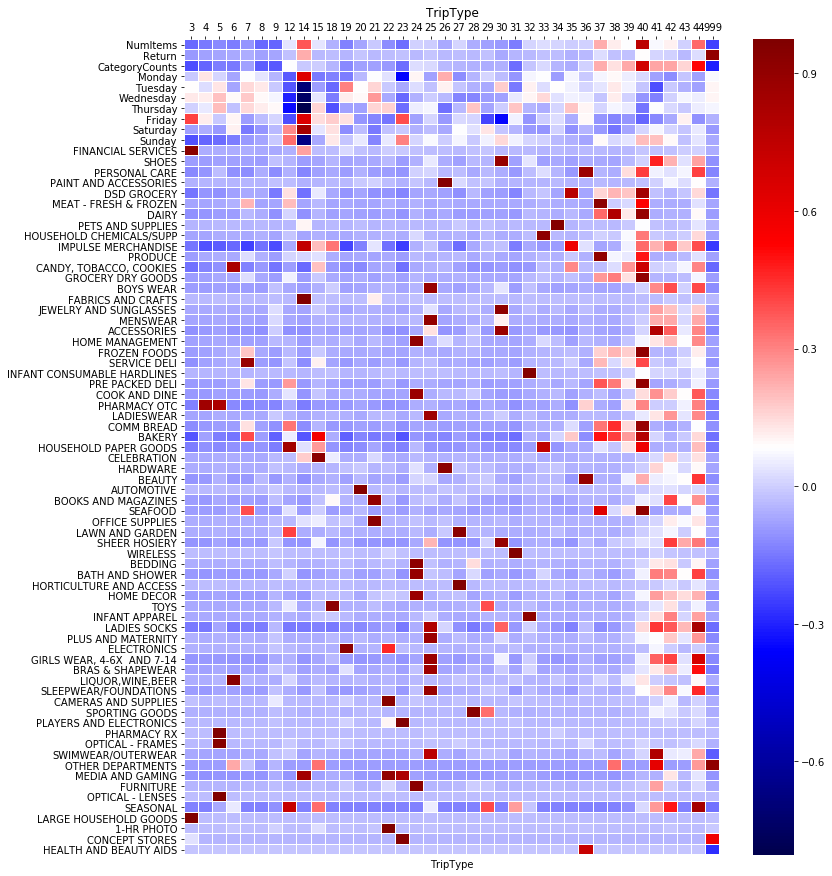

In [16]:
fig, ax = plt.subplots(figsize=(12, 15))
sns.heatmap(ax=ax, data=mygrouped_norm.T, cmap = 'seismic', linewidths=.01)
ax.xaxis.tick_top()
plt.title('TripType')

In [17]:
X = data_new.drop('TripType', axis=1)
y = data_new.TripType
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [18]:
from sklearn.neighbors import KNeighborsClassifier, RadiusNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
knn = knn.fit(X_train, y_train)
predictions = knn.predict(X_test)

In [19]:
predictions

array([  9, 999,  36, ...,  40,   9,   8], dtype=int64)

In [20]:
accuracy_score(y_test,predictions )

0.6295667550839965

In [21]:
k_range = list(range(5, 29, 2))
k_scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X, y, cv=4, scoring='accuracy')
    k_scores.append(scores.mean())
    print(scores.mean())
print(k_scores)

0.628974863017959
0.6385038627911387
0.6435858702367985
0.6460472453194042
0.6481697159540144
0.6489338849172108
0.6499311245641096
0.6502494395443906
0.6495275641411159
0.6497186153532382
0.6493793770243144
0.6476391411974773
[0.628974863017959, 0.6385038627911387, 0.6435858702367985, 0.6460472453194042, 0.6481697159540144, 0.6489338849172108, 0.6499311245641096, 0.6502494395443906, 0.6495275641411159, 0.6497186153532382, 0.6493793770243144, 0.6476391411974773]
